In [70]:
import re
import string   
from wordcloud import WordCloud
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk import pos_tag, ne_chunk
from nltk.chunk import tree2conlltags
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('punkt_tab')

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /home/fahad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/fahad/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/fahad/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/fahad/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/fahad/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /home/fahad/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/fahad/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [71]:
df = pd.read_csv('dataset/cleaned_twitter_dataset.csv')
df.head()

,id,entity,sentiment,text
0,6,Amazon,Neutral,Love Speculative Fiction? #Win a $100 #Amazon ...
1,12,Amazon,Positive,Amazon has the coolest shit I never thought I ...
2,13,Amazon,Positive,Hated packing this one but at least it sold an...
3,18,Amazon,Positive,Amazon Best Sellers: Best Sports Collectibles ...
4,49,Amazon,Neutral,I played this interesting quiz on Amazon - Try...


In [72]:
df = df[['text', 'sentiment']]

In [113]:
df.head()

,Text,Target,Sentiment
0,love win amazon facebook twitter giveaway via,Neutral,0
1,amazon shit never thought need purchas hang excit,Positive,1
2,hate pack one least sold lol flip amazon,Positive,1
3,amazon best seller best collect card old pack ...,Positive,1
4,play interest quiz amazon tri luck chanc win e...,Neutral,0


In [74]:
df = df.drop_duplicates()
df = df.dropna()


In [75]:
# rename sentiment column
df = df.rename(columns={'sentiment': 'Target'})
df = df.rename(columns={'text': 'Text'})

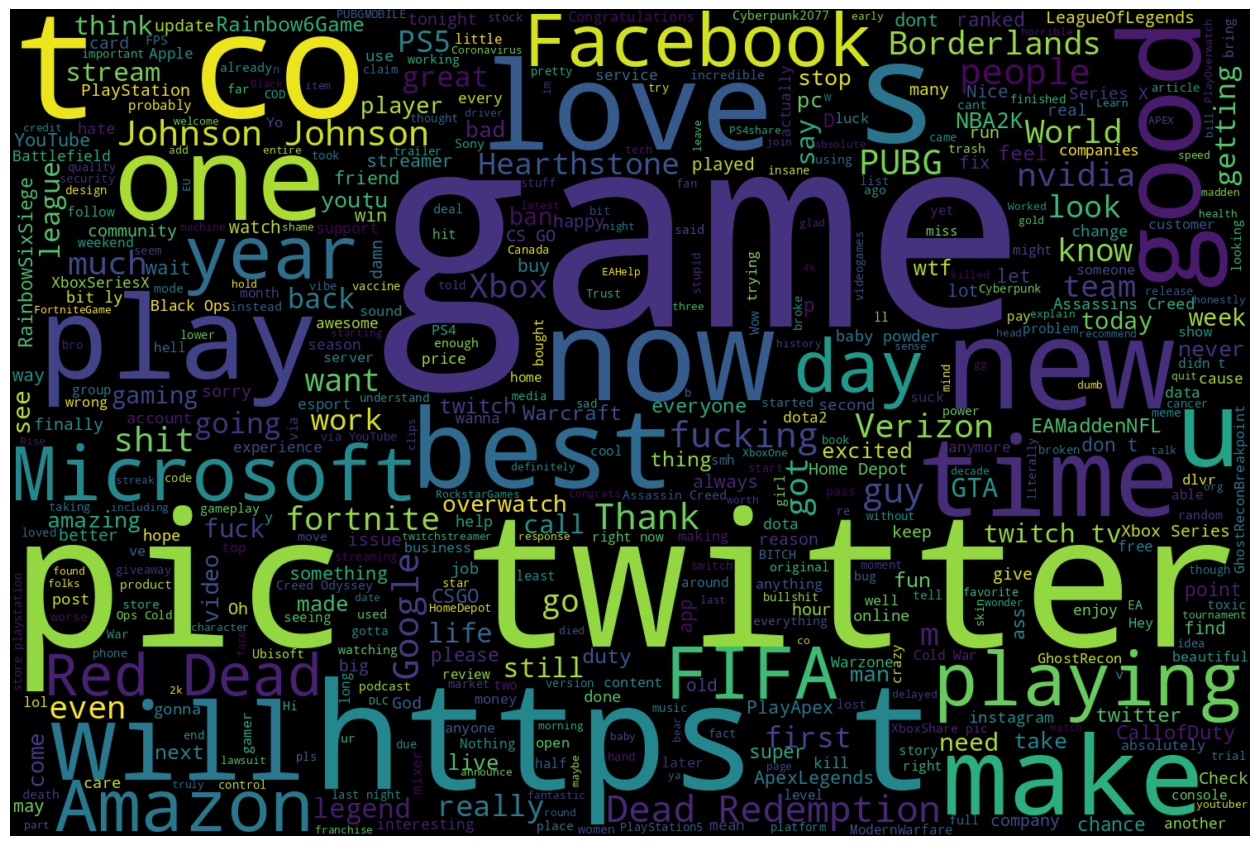

In [76]:
plt.figure(figsize=(16,12))
wordcloud = WordCloud(background_color="black",max_words=500, width=1500, height=1000).generate(' '.join(df['Text']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [77]:
df.head()

,Text,Target
0,Love Speculative Fiction? #Win a $100 #Amazon ...,Neutral
1,Amazon has the coolest shit I never thought I ...,Positive
2,Hated packing this one but at least it sold an...,Positive
3,Amazon Best Sellers: Best Sports Collectibles ...,Positive
4,I played this interesting quiz on Amazon - Try...,Neutral


<Axes: xlabel='Target', ylabel='count'>

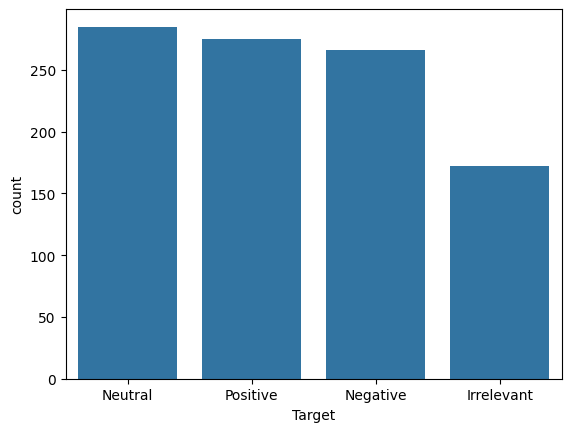

In [78]:
sns.countplot(x="Target",data=df)

In [79]:
sentiment = []

for i in df["Target"]:
    if i == "Positive":
        sentiment.append(1)
    elif (i == "Irrelevant") or (i == "Neutral"):
        sentiment.append(0)
    else:
        sentiment.append(-1)
df["Sentiment"] = sentiment


In [80]:
df.head()

,Text,Target,Sentiment
0,Love Speculative Fiction? #Win a $100 #Amazon ...,Neutral,0
1,Amazon has the coolest shit I never thought I ...,Positive,1
2,Hated packing this one but at least it sold an...,Positive,1
3,Amazon Best Sellers: Best Sports Collectibles ...,Positive,1
4,I played this interesting quiz on Amazon - Try...,Neutral,0


In [81]:
stop_words = set(stopwords.words("english"))
def predict_sentiment(new_sentence):

    knn = KNeighborsClassifier()
    vt = CountVectorizer(analyzer="word")

    # Load the trained KNN model
    knn_model = joblib.load("model/knn_model.pkl")

    # Preprocess the new sentence
    new_sentence_cleaned = cleaner(new_sentence)

    # Transform the new sentence using the CountVectorizer
    new_sentence_vectorized = vt.transform([new_sentence_cleaned])

    # Predict the sentiment
    predicted_sentiment = knn_model.predict(new_sentence_vectorized)

    print("Predicted Sentiment:", predicted_sentiment[0])

    sentiment_map = {
        -1: "Negative",
        0: "Neutral",
        1: "Positive",
    }

    return sentiment_map[predicted_sentiment[0]]

In [82]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

## Clean Text

In [83]:
# removes digits from text
df["Text"] = df["Text"].str.replace("\d","")

In [84]:
def cleaner(data):
    # Tokens
    tokens = word_tokenize(str(data).replace("'", "").lower()) 
    
    # Remove Puncs
    without_punc = [w for w in tokens if w.isalpha()]
    
    # Stopwords
    without_sw = [t for t in without_punc if t not in stop_words]
    
    # Lemmatize
    text_len = [WordNetLemmatizer().lemmatize(t) for t in without_sw]
    
    # Stem
    text_cleaned = [PorterStemmer().stem(w) for w in text_len]
    
    return " ".join(text_cleaned)


In [85]:
df["Text"] = df["Text"].apply(cleaner)

In [86]:
df["Text"]=df["Text"].str.replace("im","")

In [87]:
df["Text"].head()


0    love specul fiction win amazon giftcard facebo...
1    amazon coolest shit never thought need purchas...
2    hate pack one least sold arriv safe lol resell...
3    amazon best seller best sport collect vintag f...
4    play interest quiz amazon tri luck chanc win e...
Name: Text, dtype: object

## Rare Words

In [88]:
rare_words = pd.Series(" ".join(df["Text"]).split()).value_counts()
rare_words

game        163
play        100
get          96
http         87
like         85
           ... 
wentzvil      1
encount       1
chick         1
maci          1
memori        1
Name: count, Length: 3588, dtype: int64

In [89]:
rare_words = rare_words[rare_words <= 2]


In [90]:
df["Text"] = df["Text"].apply(lambda x: " ".join([i for i in x.split() if i not in rare_words.index]))

In [91]:
df['Text'].head()

0        love win amazon facebook twitter giveaway via
1    amazon shit never thought need purchas hang excit
2             hate pack one least sold lol flip amazon
3    amazon best seller best collect card old pack ...
4    play interest quiz amazon tri luck chanc win e...
Name: Text, dtype: object

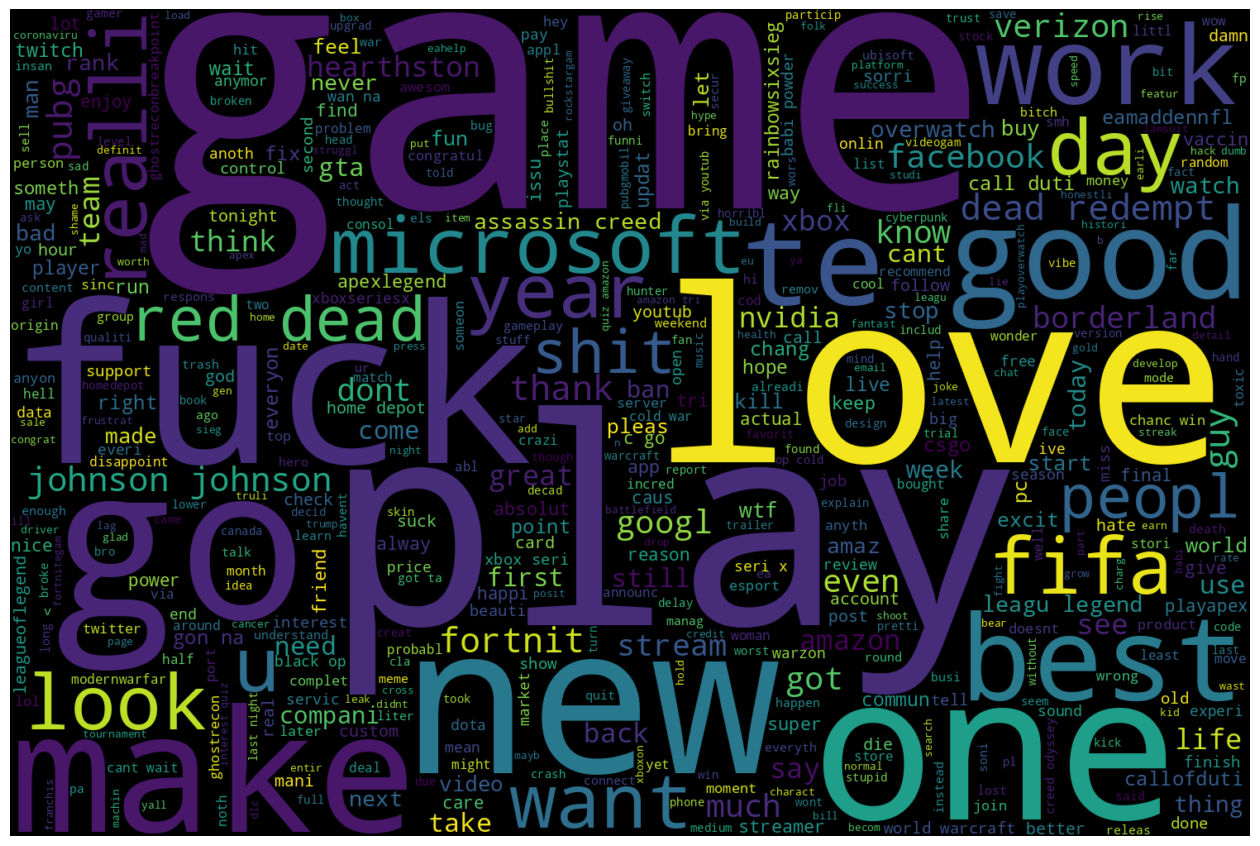

In [92]:
plt.figure(figsize=(16,12))
wordcloud = WordCloud(background_color="black",max_words=500, width=1500, height=1000).generate(' '.join(df['Text']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Train - Val - Test Split

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.naive_bayes import MultinomialNB, BernoulliNB 
from sklearn.ensemble import RandomForestClassifier

In [94]:
X = df["Text"]
y = df["Sentiment"]

<Axes: xlabel='Sentiment', ylabel='count'>

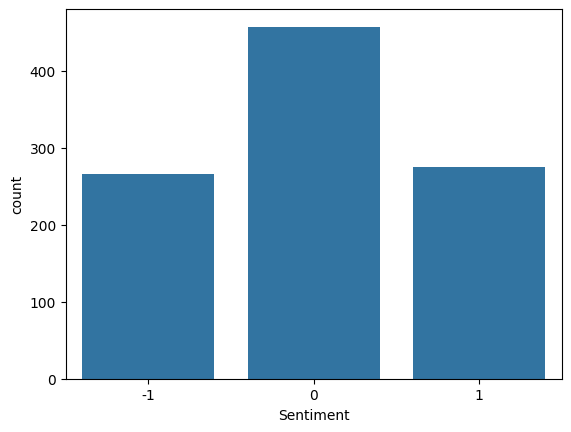

In [95]:
sns.countplot(x='Sentiment',data=df)

In [96]:
# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the sizes of the splits
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Training set size: 698
Validation set size: 150
Test set size: 150


## Count Vectorizer
This line imports the `CountVectorizer` class from scikit-learn, which is used to convert a collection of text documents into a matrix of token counts (bag-of-words representation).

In [97]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vt = CountVectorizer(analyzer="word")
X_train_count = vt.fit_transform(X_train)
X_val_count = vt.transform(X_val)
X_test_count = vt.transform(X_test)

In [99]:
X_val_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## KNN

In [100]:
from sklearn.neighbors import KNeighborsClassifier

In [101]:
knn = KNeighborsClassifier()

In [102]:
knn_model = knn.fit(X_train_count,y_train)

In [103]:
knn_pred = knn_model.predict(X_test_count)
knn_train_pred = knn_model.predict(X_train_count)

In [104]:
# Train the KNN model
knn.fit(X_train_count, y_train)

# Evaluate on validation data
y_val_pred = knn.predict(X_val_count)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

# Evaluate on test data
y_test_pred = knn.predict(X_test_count)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

Validation Accuracy: 0.4533333333333333
Validation Classification Report:
               precision    recall  f1-score   support

          -1       0.28      0.42      0.33        31
           0       0.51      0.68      0.58        66
           1       0.67      0.19      0.29        53

    accuracy                           0.45       150
   macro avg       0.48      0.43      0.40       150
weighted avg       0.52      0.45      0.43       150

Test Accuracy: 0.46
Test Classification Report:
               precision    recall  f1-score   support

          -1       0.41      0.55      0.47        40
           0       0.49      0.63      0.55        65
           1       0.50      0.13      0.21        45

    accuracy                           0.46       150
   macro avg       0.47      0.44      0.41       150
weighted avg       0.47      0.46      0.43       150



<Axes: >

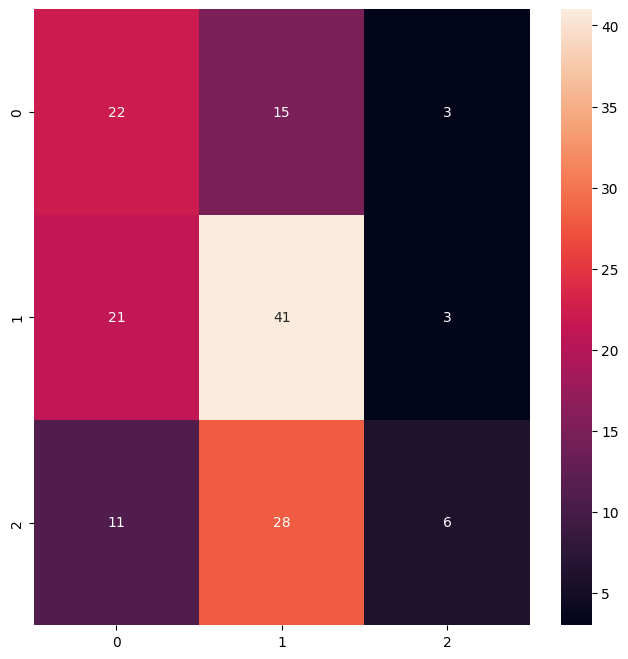

In [105]:
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot = True,fmt = "d")

In [ ]:
import joblib
import pickle

# Save the trained KNN model to a .pkl file
# joblib.dump(knn, 'model/knn_model.pkl')
mod_file = 'model/knn_model.model'
pickle.dump(vt, open("model/vectorizer.pickle", "wb")) #!Save vectorizer
pickle.dump(knn, open(mod_file, 'wb'))

## Load and Infer

In [107]:
# Load the trained KNN model
knn_model = joblib.load('model/knn_model.pkl')

# Define a new sentence
new_sentence = "He is the worst teacher of the universe"

# Preprocess the new sentence
new_sentence_cleaned = cleaner(new_sentence)

# Transform the new sentence using the CountVectorizer
new_sentence_vectorized = vt.transform([new_sentence_cleaned])

# Predict the sentiment
predicted_sentiment = knn_model.predict(new_sentence_vectorized)

print("Predicted Sentiment:", predicted_sentiment[0])

Predicted Sentiment: 0


In [108]:
loaded_vt = pickle.load(open("model/vectorizer.pickle", 'rb'))
loaded_model = pickle.load(open(mod_file, 'rb'))

In [109]:
from sklearn.feature_extraction.text import CountVectorizer

def predict_sentiment(new_sentence):

    # knn = KNeighborsClassifier()
    
    # # Load the trained KNN model
    # knn_model = joblib.load("model/knn_model.pkl")

    # Preprocess the new sentence
    new_sentence_cleaned = cleaner(new_sentence)

    # Transform the new sentence using the CountVectorizer
    new_sentence_vectorized = loaded_vt.transform([new_sentence_cleaned])

    # Predict the sentiment
    predicted_sentiment = loaded_model.predict(new_sentence_vectorized)

    print("Predicted Sentiment:", predicted_sentiment[0])

    sentiment_map = {
        -1: "Negative",
        0: "Neutral",
        1: "Positive",
    }

    return sentiment_map[predicted_sentiment[0]]

In [112]:
predict_sentiment('He is the best teacher Bangladesh')

Predicted Sentiment: 0


'Neutral'